In [112]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

home = print(os.environ['HOME']) # if the HOME variable is set to '/Users/lou', we are on Lou's mac, else Github
if home == '/Users/lou':
    filename = '/Users/lou/GITHubProjects/Thinkful/Datafiles/planecrashinfo_20181121001952_clean.csv'
else:
    filename = 'planecrashinfo_20181121001952_clean.csv'
    
crashes = pd.read_csv(filename)
crashes_df = crashes[['country_code', 'operator_code', 'ac_type', 'aboard_count', 'fatal_count', 'ground']]

# let's remove all the NaN's for the numeric data types
crashes_df = crashes_df.dropna(subset=['aboard_count'])
crashes_df = crashes_df.dropna(subset=['fatal_count'])  
crashes_df = crashes_df.dropna(subset=['ground'])

# let's strip off all leading and trailing spaces from the numeric data types
crashes_df = crashes_df[(crashes_df['aboard_count'].str.strip() != '?')] # remove unknown aboard_cont
crashes_df = crashes_df[(crashes_df['ground'].str.strip()       != '?')]       # remove unknown ground count
crashes_df = crashes_df[(crashes_df['fatal_count'].str.strip()  != '?')]  # remove unknown fatal_count

# let's convert all of these numeric data types to numerics
crashes_df['ground']       = pd.to_numeric(crashes_df['ground'])
crashes_df['aboard_count'] = pd.to_numeric(crashes_df['aboard_count'])
crashes_df['fatal_count']  = pd.to_numeric(crashes_df['fatal_count'])
# print("there are now {} clean rows of data in crashes_df.".format(len(crashes_df)))
# print(crashes_df.columns)

FATALITIES = 150
# we only want big crashes, more than n fatalties
crashes_big = crashes_df[(crashes_df['fatal_count']  > FATALITIES)]
crashes_df = crashes_big

# crashes_df_country = crashes_df[['country_code', 'aboard_count', 'fatal_count', 'ground']]
crashes_df_country = crashes_df[['country_code', 'fatal_count']] # limit the scope
crashes_df_country.sort_values(['country_code', 'fatal_count'],ascending=True) # sort it
crashes_df_country = crashes_df_country.groupby('country_code')[['country_code','fatal_count']].mean()

/Users/lou


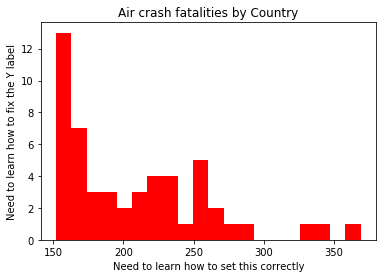

In [119]:
# Build our histogram. Let's go ahead and set the color too.
x=crashes_df_country['fatal_count']
plt.hist(x, bins=20, color='red')
plt.title('Air crash fatalities by Country')
plt.xlabel('Need to learn how to set this correctly')
plt.ylabel("Need to learn how to fix the Y label")
plt.show()

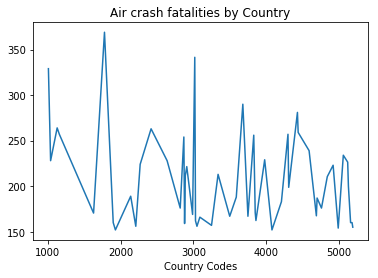

In [117]:
%matplotlib inline
plt.title("Air crash fatalities by Country")
plt.xlabel('Country Codes')
plt.plot(crashes_df_country['fatal_count'])
plt.show()